## Transfer Learning

In [2]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Here we import the model from the link given on tensorflow hub and we give the image size (24 X 24) and add (3,) to add the three RGB channels.

In [3]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [5]:
gold_fish=Image.open('Veiltail-goldfish.jpg').resize(IMAGE_SHAPE)

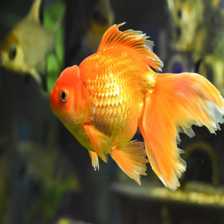

In [6]:
gold_fish

We convert the image into numpy array and scale the image values to make its values between 0 and 1 by dividing it by 255.

In [7]:
gold_fish = np.array(gold_fish)/255

In [8]:
gold_fish

array([[[0.07843137, 0.08627451, 0.0745098 ],
        [0.0745098 , 0.08235294, 0.07058824],
        [0.0745098 , 0.08235294, 0.07058824],
        ...,
        [0.36470588, 0.36862745, 0.35686275],
        [0.36078431, 0.36862745, 0.37254902],
        [0.34117647, 0.36078431, 0.36470588]],

       [[0.08235294, 0.09019608, 0.07843137],
        [0.0745098 , 0.08235294, 0.07058824],
        [0.0745098 , 0.08627451, 0.07058824],
        ...,
        [0.35294118, 0.36078431, 0.34509804],
        [0.36078431, 0.36862745, 0.36862745],
        [0.35294118, 0.36862745, 0.37254902]],

       [[0.08235294, 0.09019608, 0.07843137],
        [0.07843137, 0.08627451, 0.07843137],
        [0.08235294, 0.09019608, 0.07843137],
        ...,
        [0.33333333, 0.34901961, 0.32941176],
        [0.36470588, 0.37647059, 0.37254902],
        [0.35294118, 0.36470588, 0.36470588]],

       ...,

       [[0.17254902, 0.18431373, 0.09803922],
        [0.17254902, 0.18823529, 0.09803922],
        [0.18823529, 0

We want to make a prediction using the model we imported from TF hub so we need to add one more dimension to the image to make it ready for the prediction.

In [9]:
gold_fish[np.newaxis,...].shape

(1, 224, 224, 3)

After making the prediction of the image we store the output array in result array, then we get the number of the maximum index using argmax function.

In [13]:
result = classifier.predict(gold_fish[np.newaxis,...])

In [14]:
np.argmax(result)

2

In order to find the name of the class we will read the txt file downloaded from tensorflow hub with model and find the resultant class.

In [15]:
with open ('images-classes.txt','r') as f:
    image_labels = f.read().splitlines()

In [16]:
image_labels[:10]

['background',
 'tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen']

In [18]:
result_class = image_labels[np.argmax(result)]
result_class

'goldfish'

The image was classified correctly by our pre-trained model.

## Flowers Dataset with transfer learning

In [20]:
import pathlib
data_dir=pathlib.Path('..\\Churn-Modelling-ANN\\datasets\\flower_photos')
data_dir

WindowsPath('../Churn-Modelling-ANN/datasets/flower_photos')

Instead of downloading flowers dataset, we will refer to the directory downloaded earlier in Data Augmentation tutorial.

In [22]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('../Churn-Modelling-ANN/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('../Churn-Modelling-ANN/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('../Churn-Modelling-ANN/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('../Churn-Modelling-ANN/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('../Churn-Modelling-ANN/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

glob function is used to get all paths that in a directory with certain createria (with .jpg extension)

In [23]:
roses=list(data_dir.glob('roses/*.jpg'))

In [24]:
roses[:5]

[WindowsPath('../Churn-Modelling-ANN/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('../Churn-Modelling-ANN/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('../Churn-Modelling-ANN/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('../Churn-Modelling-ANN/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('../Churn-Modelling-ANN/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

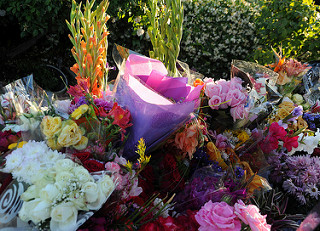

In [25]:
Image.open(str(roses[3]))

We can store the paths of all images in each directory in one list with the name of the class.

In [27]:
flower_images_dict={
    'daisy':list(data_dir.glob('daisy/*.jpg')),
    'dandelion':list(data_dir.glob('dandelion/*.jpg')),
    'roses':list(data_dir.glob('roses/*.jpg')),
    'sunflowers':list(data_dir.glob('sunflowers/*.jpg')),
    'tulips': list(data_dir.glob('tulips/*.jpg'))
}

In [29]:
len(flower_images_dict['tulips'])

799

In [30]:
flower_labels_dict = {
    'daisy': 0,
    'dandelion':1,
    'roses':2,
    'sunflowers':3,
    'tulips': 4
}

In [55]:
X=[]
y=[]
for flower,path in flower_images_dict.items():
    for i in path:
        img = cv2.imread(str(i))
        image_resized=cv2.resize(img,(224,224))
        X.append(image_resized)
        y.append(flower_labels_dict[flower])

In [59]:
X=np.array(X)/255
y=np.array(y)

After processing the image dataset, we will use the classifier of the model to classify the flower images. 

In [74]:
predicted = classifier.predict(np.array([X[1000],X[1],X[2]]))

In [75]:
list(np.argmax(predicted, axis=1))

[329, 986, 986]

daisy flowers X[0], X[1] are correctly classified. but the other image X[1000] is classified as sea urchin.

In [79]:
image_labels[986]

'daisy'

In [76]:
image_labels[329]

'sea urchin'

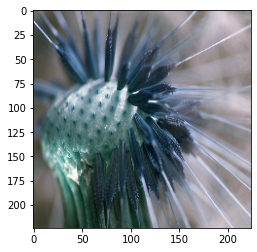

In [78]:
plt.imshow(X[1000])

Now we will use a pre-learned models and customize some layers to classify flower images.

In [80]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

We will use the model /feature_vector/4 with parameter trainable = False which means to freeze the hidden layers.

In [81]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


Here we added the top layer tf.keras.layers.Dense(num_of_flowers) and the num_of_flowers =5, the number of classes.

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [85]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 132s 1s/step - loss: 1.1045 - acc: 0.5651
Epoch 2/5
86/86 [==============================] - 133s 2s/step - loss: 0.4553 - acc: 0.8477
Epoch 3/5
86/86 [==============================] - 138s 2s/step - loss: 0.3332 - acc: 0.8916
Epoch 4/5
86/86 [==============================] - 130s 2s/step - loss: 0.2714 - acc: 0.9104
Epoch 5/5
86/86 [==============================] - 130s 2s/step - loss: 0.2203 - acc: 0.9293


In [86]:
model.evaluate(X_test,y_test)

29/29 [==============================] - 45s 2s/step - loss: 0.3571 - acc: 0.8736


[0.3571214973926544, 0.8736383318901062]

#### The accuracy of the model improved to 92.93% in training phase and with test dataset, the accuracy is 87.36% with only 5 epochs.

In [87]:
prediction=model.predict(np.array([X[1000],X[500],X[1]]))

In [89]:
np.argmax(prediction, axis=1)

array([1, 0, 0], dtype=int64)

In [91]:
flower_labels_dict

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

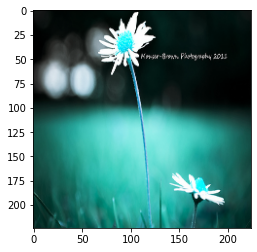

In [94]:
plt.imshow(X[500])